# Credit card fraud detection modeling

## 0 - Functions and librairies

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
import numpy as np
#import imblearn
#import collections

In [2]:
from pandas import read_csv
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import tree
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("df_clean2.csv",delimiter=',')

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
def prepare_dataset(df):
    last_col = len(df.columns) - 1
    X, y = df.iloc[:,0:last_col-1],df.iloc[:,last_col] 
    return X, y

In [8]:
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2)

In [9]:
# model evaluation
def evaluate_model(X, y, model):
    # evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    #evaluation metric
    metric = make_scorer(f2_score)
    f2_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
    accuracy_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
    return f2_scores,accuracy_scores

In [10]:
# define models to test
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='liblinear'))
    names.append('LR')
    # LDA
    models.append(LinearDiscriminantAnalysis())
    names.append('LDA')
    # Naive Bayes
    models.append(GaussianNB())
    names.append('NB')
    # GPC
    models.append(GaussianProcessClassifier())
    names.append('GPC')
    # SVM
    models.append(SVC(gamma='scale'))
    names.append('SVM')
    #Knn
    models.append(KNeighborsClassifier())
    names.append('KNN')
    #Decision tree
    models.append(tree.DecisionTreeClassifier())
    names.append('Decision Tree')
    return models, names

In [11]:
df.sample(5)

,transaction_amount,is_declined,total_number_declines_per_day,is_foreign_transaction,is_high_risk_country,daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,is_fraudulent
1897,7560.173918,0,0,0,0,604,410.0,3,0
858,472.243970,0,0,0,0,0,0.0,0,0
69,21801.615350,0,0,1,0,0,0.0,0,1
215,24824.790380,0,7,0,0,0,0.0,0,1
1251,4281.173278,0,0,0,0,0,0.0,0,0


In [12]:
df.columns

Index(['transaction_amount', 'is_declined', 'total_number_declines_per_day',
       'is_foreign_transaction', 'is_high_risk_country',
       'daily_chargeback_avg_amt', '6_month_avg_chbk_amt', '6-month_chbk_freq',
       'is_fraudulent'],
      dtype='object')

## 1 - Modeling

### A - Baseline naive classifier 

In [13]:
# Separating features and target

In [14]:
X, y = prepare_dataset(df)

In [15]:
#Creating a dummy classifier that always predict the minority class as a baseline
model = DummyClassifier(strategy='constant', constant=1)

In [16]:
# Evaluate the dummy classifier
f2_scores, accuracy_scores = evaluate_model(X, y, model)

In [17]:
print('Mean accuracy: %.3f (%.3f)' % (accuracy_scores.mean(), accuracy_scores.std()))

Mean accuracy: 0.150 (0.001)


In [18]:
print('Mean F2: %.3f (%.3f)' % (f2_scores.mean(), f2_scores.std()))

Mean F2: 0.469 (0.002)


#### Credit card fraud detection is an anomaly detection where false negative are worse than false positive.
#### So we are gonna use the F2 Score as a metric !

#### Our baseline model has an F2 score of 0.47 and an accuracy of 15%

### B - Model selection

F2 - Score : LR 0.831 (0.048)
Accuracy : LR 0.960 (0.009)
F2 - Score : LDA 0.812 (0.043)
Accuracy : LDA 0.959 (0.008)
F2 - Score : NB 0.818 (0.046)
Accuracy : NB 0.945 (0.012)
F2 - Score : GPC 0.151 (0.049)
Accuracy : GPC 0.826 (0.013)
F2 - Score : SVM 0.382 (0.075)
Accuracy : SVM 0.897 (0.011)
F2 - Score : KNN 0.513 (0.078)
Accuracy : KNN 0.898 (0.013)
F2 - Score : Decision Tree 0.863 (0.035)
Accuracy : Decision Tree 0.958 (0.009)


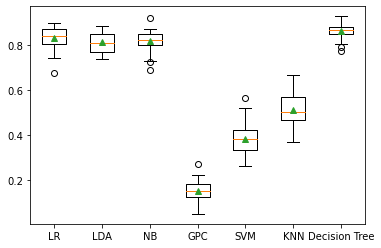

In [19]:
# get models
models, names = get_models()
results = list()
# Models evaluation
for i in range(len(models)):
# evaluate the model and store results
    f2_scores, accuracy_scores = evaluate_model(X, y, models[i])
    results.append(f2_scores)
# summarize and store
    print('F2 - Score : %s %.3f (%.3f)' % (names[i], f2_scores.mean(), f2_scores.std()))
    print('Accuracy : %s %.3f (%.3f)' % (names[i], accuracy_scores.mean(), accuracy_scores.std()))
# plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### The models that perform better than the baseline are :
#### - Logistic regression
#### - Linear Discriminant analysis
#### - Naive Bayes
#### - K Nearest Neighbor
#### - Decision Tree

### Out of the 5 models, the model that performs the best is the Decision Tree with an F2 - score of 0.865

### C - Decisition Tree

In [20]:
# Splitting the data into 60% training, 20 % Validation and 20 % Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

#### Baseline Decisition Tree

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [22]:
y_pred = clf.predict(X_val)

In [23]:
accuracy_score(y_val, y_pred)

0.9564489112227805

In [ ]:
y_val.value_counts()

In [ ]:
(pd.DataFrame(y_pred)).value_counts()

In [ ]:
confusion_matrix(y_val, y_pred)

In [ ]:
confusion_matrix_2 = confusion_matrix(y_val, y_pred)

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt="", cmap='Blues')

In [ ]:
f2_score(y_val, y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_val,).ravel()

In [25]:
df.columns

Index(['transaction_amount', 'is_declined', 'total_number_declines_per_day',
       'is_foreign_transaction', 'is_high_risk_country',
       'daily_chargeback_avg_amt', '6_month_avg_chbk_amt', '6-month_chbk_freq',
       'is_fraudulent'],
      dtype='object')

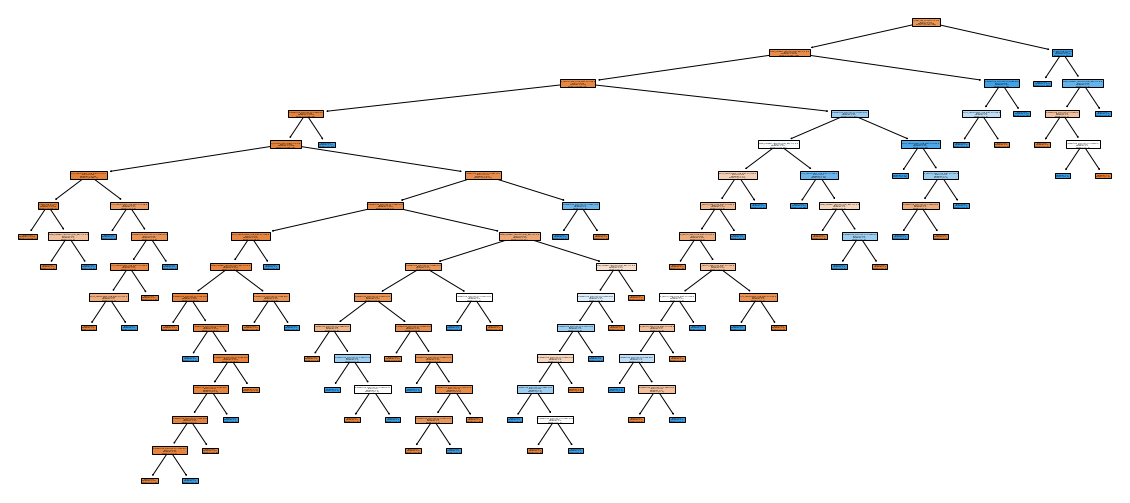

In [43]:
plt.figure(figsize=(20,9))
_=tree.plot_tree(clf,
                   feature_names=["transaction_amount","is_declined","total_number_declines_per_day","is_foreign_transaction","is_high_risk_country","daily_chargeback_avg_amt","6_month_avg_chbk_amt","6-month_chbk_freq"],  
                   filled=True
                  )

In [44]:
clf.get_depth()

15

In [45]:
clf.feature_importances_

array([0.16097095, 0.00303593, 0.21149761, 0.00671983, 0.40237427,
       0.04064221, 0.17475921])

In [38]:
clf.feature_names_in_

array(['transaction_amount', 'is_declined',
       'total_number_declines_per_day', 'is_foreign_transaction',
       'is_high_risk_country', 'daily_chargeback_avg_amt',
       '6_month_avg_chbk_amt'], dtype=object)

### Hyperparameter tuning

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas), scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.alpha)


In [47]:
list(range(3,15))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [52]:
6*5*5

150

In [60]:
params = {'max_depth':[3,5,7,10,12,15], 'min_samples_split': [5,10,20,30,40],'min_samples_leaf':[1,5,10,15,20] }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3,scoring="accuracy",error_score='raise')

In [61]:
grid_search_cv.fit(X_train,y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10, 12, 15],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [5, 10, 20, 30, 40]},
             scoring='accuracy', verbose=1)

In [64]:
(pd.DataFrame(grid_search_cv.cv_results_)).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003493,0.001208,0.001905,0.000704,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.959799,0.951424,0.961409,0.957544,0.004377,126
1,0.002838,0.000625,0.001823,0.000614,3,1,10,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.959799,0.951424,0.961409,0.957544,0.004377,126
2,0.003098,0.000791,0.001855,0.000648,3,1,20,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.959799,0.951424,0.961409,0.957544,0.004377,126
3,0.001336,0.000475,0.000999,0.000005,3,1,30,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.959799,0.951424,0.961409,0.957544,0.004377,126
4,0.002007,0.000806,0.001335,0.000471,3,1,40,"{'max_depth': 3, 'min_samples_leaf': 1, 'min_s...",0.959799,0.951424,0.961409,0.957544,0.004377,126


In [67]:
grid_search_cv.best_score_

0.968156404693115

In [66]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [68]:
best_decision_tree = grid_search_cv.best_estimator_

In [69]:
y_pred = best_decision_tree.predict(X_val)

In [ ]:
accuracy_score(y_val, y_pred)

## Export the baseline and the improved model

In [ ]:
#import joblib
#joblib.dump(model, 'model_name.pkl', compress=9)

In [ ]:
# Export the testing dataset

In [ ]:
#from numpy import savetxt
#savetxt('X_test.csv', X_test, delimiter=',')
#savetxt('y_test.csv', y_test, delimiter=',')